In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import sqrt
from PIL import Image
import matplotlib.image as mpimg
import os
from shutil import copyfile
import matplotlib

In [6]:
def load_image( infilename ) :
    img = Image.open(infilename)
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

In [7]:
def erase_line(img, n, m):
    x1,y1 = randint(0,n-1),randint(0,m-1)
    x2,y2 = randint(0,n-1),randint(0,m-1)
    a = y1 - y2
    b = x2 - x1
    c = x1 * y2 - x2 * y1
    ret = img.copy()
    for x0 in range(min(x1, x2), max(x1, x2)):
        for y0 in range(min(y1,y2), max(y1, y2)):
            d = abs(a * x0 + b * y0 + c)/sqrt(a*a+b*b)
            if d < 5:
                ret[x0][y0]=255
    return ret

In [8]:
def erase_box(img, n, m):
    x1,y1 = randint(50,n-31),randint(50,m-31)
    x2,y2 = x1+30,y1+30
    ret = img.copy()
    for x0 in range(min(x1, x2), max(x1, x2)):
        for y0 in range(min(y1,y2), max(y1, y2)):
            ret[x0][y0]=255
    return ret

In [68]:
#Test and Train to be swapped
n = 1
for file in os.listdir("Cropped-Faces/test-images"):
    img = load_image("Cropped-Faces/test-images/"+ file)
    """
    copyfile("Cropped-Faces/test-images/"+ file, "Test-Data/x/"+str(n)+".jpg")
    n += 1
    """
    for i in range(3):
        img = erase_line(img, img.shape[0], img.shape[1])
    save_image(img, "Test-Data/x/"+str(n)+".jpg")
    copyfile("Cropped-Faces/test-images/"+ file, "Test-Data/y/"+str(n)+".jpg")
    n += 1
    img = load_image("Cropped-Faces/test-images/" + file)
    img = erase_box(img, img.shape[0], img.shape[1])
    save_image(img, "Test-Data/x/"+str(n)+".jpg")
    copyfile("Cropped-Faces/test-images/"+ file, "Test-Data/y/"+str(n)+".jpg")
    n += 1

In [38]:
load_image("erase-test.jpg")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [64]:
img = load_image("cropped-test.jpg")

In [59]:
img.shape

(150, 90)

In [24]:
img = erase_line(img, img.shape[0], img.shape[1])

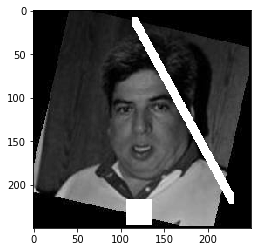

In [28]:
plt.imshow(img, cmap="gray")

In [54]:
img = mpimg.imread('cropped-test.jpg')
print(type(img))

<class 'numpy.ndarray'>


ValueError: num must be 1 <= num <= 25, not 26

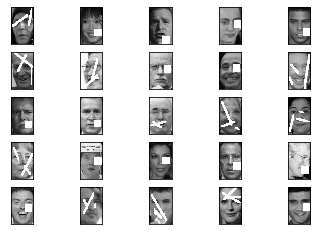

In [50]:
i = 0
for file in os.listdir("Test-Data/x"):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Image.open("Test-Data/x/"+ file), cmap="gray")
    i += 1

In [65]:
save_image(img, "save-test.jpg")

In [66]:
img = load_image("save-test.jpg")

In [67]:
img.shape

(150, 90)